## Name: 
### Rawan AlHarb , Areej Alhowaity

## ID:
### 421010012 , 421010021

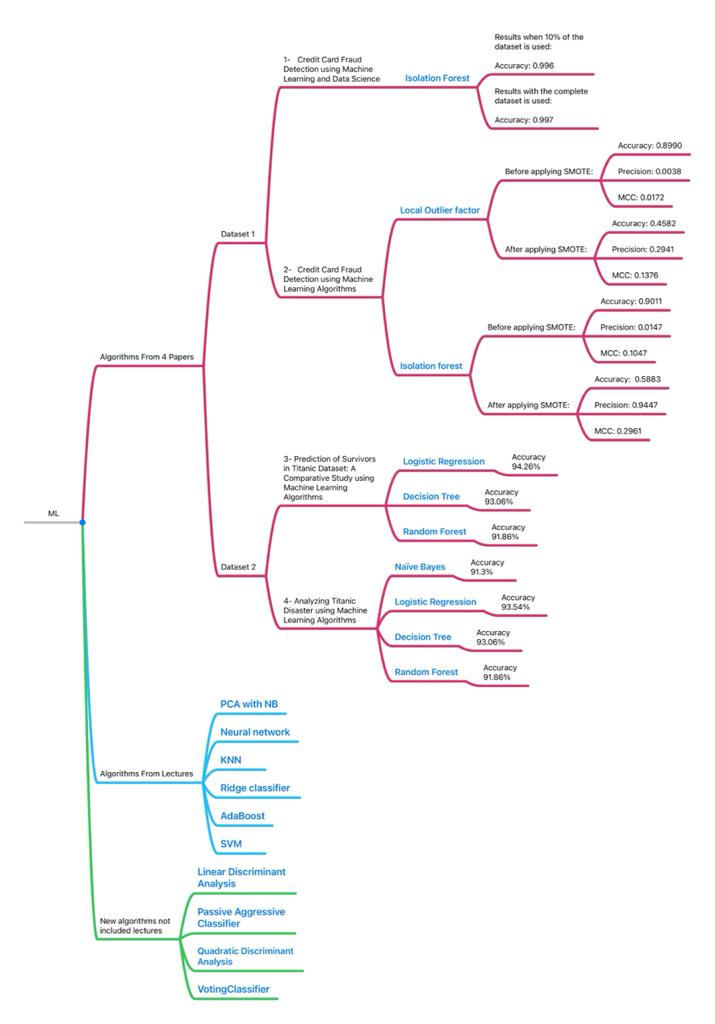

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Dataset 2 : Credit Card Fraud Detection
#### Link: https://www.kaggle.com/mlg-ulb/creditcardfraud
### 2 Papers : 
##### 1- Credit Card Fraud Detection using Machine Learning Algorithms
##### 2-Credit Card Fraud Detection using Machine Learning and Data Science

In [2]:
df=pd.read_csv('creditcard.csv')  # Load training dataset 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
feature_names=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [8]:
X=df[feature_names]
y=df[['Class']]


In [9]:
from sklearn.pipeline import Pipeline  #  pipeline
from sklearn.pipeline import FeatureUnion  # featureUnion
from sklearn.preprocessing import MinMaxScaler  # minMax Scaler

In [10]:
num_attribs = list (X)  
acc = []

In [11]:
# Define class for selection of columns from dataframes
from sklearn.base import BaseEstimator, TransformerMixin
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
#Function to Calculate all metrics for any model binary classifier
# precision, recall, fscore, support ,acc
def append_score(X_test,y_test,model):
    predicted = model.predict(X_test)
    precision1, recall1, fscore1, support1 = score(y_test, predicted,average='binary')
    precision.append(precision1)
    recall.append(recall1)
    fscore.append(fscore1)
    support.append(support1)
    acc.append(accuracy_score(y_test, predicted))

In [13]:
num_pipeline = Pipeline([
('selector', DFSelector(num_attribs)),
('std_scaler', MinMaxScaler()),
])

In [14]:
X = num_pipeline.fit_transform(X)  

X.shape  


(284807, 30)

In [15]:
#Shuffle and split prepared datasets to train and test (33%) datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

# Algorithms From Lectures

## 1- svm

In [16]:
precision, recall, fscore, support , acc = [],[],[],[],[]

In [17]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, np.ravel(y_train))
append_score(X_test,y_test,clf_svm)

## 2- KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn =KNeighborsClassifier()
clf_knn.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_knn)


## 3- PCA with NB

In [19]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

pca = PCA(n_components=8)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train1, y_train)
append_score(X_test1,y_test,gnb)


## 4- RidgeClassifier

In [20]:
from sklearn.linear_model import RidgeClassifier

clf_ridge =RidgeClassifier()
clf_ridge.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_ridge)

## 5- AdaBoostClassifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf_AdaBoost =AdaBoostClassifier()
clf_AdaBoost.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_AdaBoost)

## 6- Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier
clf_nn=MLPClassifier()
clf_nn.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_nn)

# New Algorithms not included lectures

## 1- Quadratic Discriminant Analysis

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda=QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_qda)

## 2- Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_lda)

## 3- VotingClassifier

In [25]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(estimators=[('qda', clf_qda), ('svm', clf_svm), ('knn', clf_knn)], voting='hard')
clf_voting.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_voting)


## 4- Passive Aggressive Classifier

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf_pac=PassiveAggressiveClassifier()
clf_pac.fit(X_train,  np.ravel(y_train))
append_score(X_test,y_test,clf_pac)

# Evaluation stage

In [30]:
#Create a data frame with metrics and print as a table
model_name = ['SVM','Kneighbors','PCA_NB','AdaBoost','Ridge','NN','QDA','LDA','Voting','PAC']
model_category = ['From Lecture','From Lecture','From Lecture','From Lecture','From Lecture','From Lecture','Not in Lecture','Not in Lecture','Not in Lecture','Not in Lecture']

df = pd.DataFrame(list(zip(model_name, model_category,precision, recall, fscore , acc)) ,
                  columns = ['Name', 'Source','Precision','Recall', 'Fscore' ,'Accuracy']) 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+----+------------+----------------+-------------+----------+----------+------------+
|    | Name       | Source         |   Precision |   Recall |   Fscore |   Accuracy |
|----+------------+----------------+-------------+----------+----------+------------|
|  0 | SVM        | From Lecture   |   0.807229  | 0.770115 | 0.788235 |   0.999234 |
|  1 | Kneighbors | From Lecture   |   0.912409  | 0.718391 | 0.803859 |   0.999351 |
|  2 | PCA_NB     | From Lecture   |   0.272727  | 0.482759 | 0.348548 |   0.996659 |
|  3 | AdaBoost   | From Lecture   |   0.797753  | 0.408046 | 0.539924 |   0.998713 |
|  4 | Ridge      | From Lecture   |   0.829787  | 0.672414 | 0.742857 |   0.999138 |
|  5 | NN         | From Lecture   |   0.85      | 0.683908 | 0.757962 |   0.999191 |
|  6 | QDA        | Not in Lecture |   0.0689013 | 0.850575 | 0.127476 |   0.978444 |
|  7 | LDA        | Not in Lecture |   0.829932  | 0.701149 | 0.760125 |   0.999181 |
|  8 | Voting     | Not in Lecture |   0.810651  | 0.7

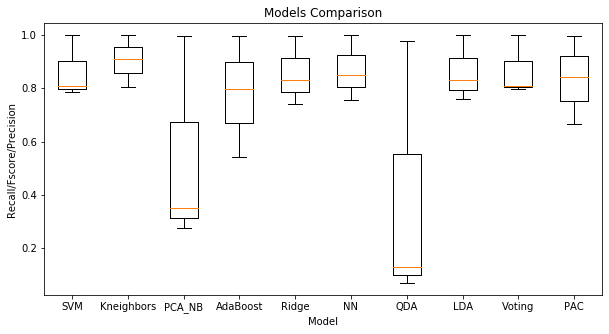

In [28]:
#Plot metrics is box plot

plt.figure(figsize=(10,5))
plt.boxplot(df.drop(['Name','Source','Recall'],axis=1))
plt.title('Models Comparison')
plt.xlabel('Model')
plt.ylabel('Recall/Fscore/Precision')
plt.xticks(np.arange(1,len(acc)+1),df.Name)
plt.show()

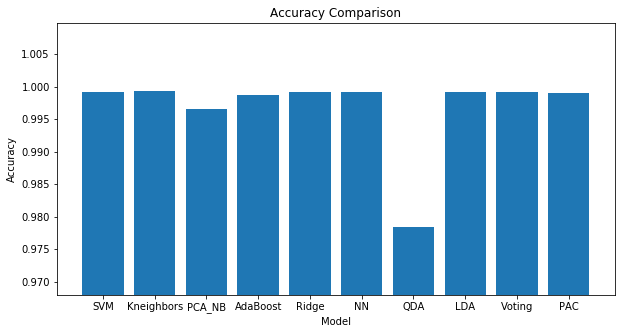

In [29]:
#View Accuracy
plt.figure(figsize=(10,5))
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.bar(df.Name,df.Accuracy)
peak = df.Accuracy.max()-df.Accuracy.min()
plt.ylim(max(0,df.Accuracy.min()-peak/2.), df.Accuracy.max()+peak/2.)
plt.show()